In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"D:\Social_Network_Ads.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dataset.drop("User ID",axis=1,inplace=True)

In [5]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
dataset.isnull().any()

Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

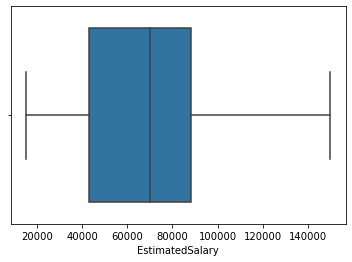

In [7]:
sns.boxplot(dataset["EstimatedSalary"])

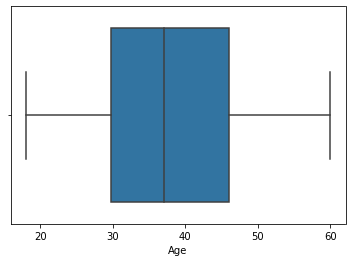

In [8]:
sns.boxplot(dataset["Age"])

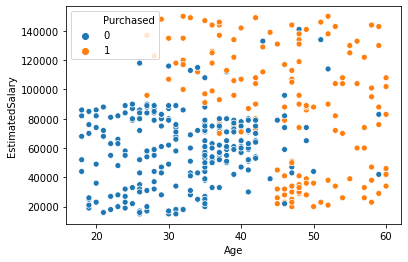

In [9]:
sns.scatterplot(dataset["Age"],dataset["EstimatedSalary"],hue=dataset["Purchased"])

In [10]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [11]:
pd.crosstab(dataset["Gender"],dataset["Purchased"])

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [12]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [13]:
dataset=pd.get_dummies(dataset,columns=["Gender"])

In [14]:
dataset

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [15]:
x=dataset.drop("Purchased",axis=1)

In [16]:
x

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


In [17]:
y=dataset["Purchased"]

In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train.shape

(320, 4)

In [22]:
x_test.shape

(80, 4)

In [23]:
y_train.shape

(320,)

In [24]:
y_test.shape

(80,)

#### Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
#Init MinMax Scaler
sc=MinMaxScaler()

In [27]:
x_train=sc.fit_transform(x_train)

In [28]:
x_train

array([[0.21428571, 0.31111111, 1.        , 0.        ],
       [0.66666667, 0.0962963 , 0.        , 1.        ],
       [0.5       , 0.88148148, 1.        , 0.        ],
       ...,
       [0.5952381 , 0.87407407, 1.        , 0.        ],
       [0.5       , 0.45925926, 0.        , 1.        ],
       [0.33333333, 0.52592593, 1.        , 0.        ]])

In [30]:
x_test=sc.transform(x_test)

In [31]:
x_test

array([[0.66666667, 0.05185185, 1.        , 0.        ],
       [0.97619048, 0.54074074, 1.        , 0.        ],
       [0.23809524, 0.21481481, 1.        , 0.        ],
       [0.71428571, 0.6       , 1.        , 0.        ],
       [0.26190476, 0.0962963 , 1.        , 0.        ],
       [0.28571429, 0.34814815, 1.        , 0.        ],
       [0.69047619, 0.68148148, 1.        , 0.        ],
       [0.26190476, 0.5037037 , 1.        , 0.        ],
       [0.52380952, 0.44444444, 0.        , 1.        ],
       [0.57142857, 0.37037037, 0.        , 1.        ],
       [0.4047619 , 0.37037037, 1.        , 0.        ],
       [0.83333333, 0.14074074, 1.        , 0.        ],
       [0.11904762, 0.24444444, 1.        , 0.        ],
       [0.04761905, 0.05925926, 1.        , 0.        ],
       [0.28571429, 0.53333333, 0.        , 1.        ],
       [0.4047619 , 0.68888889, 0.        , 1.        ],
       [0.80952381, 0.17037037, 1.        , 0.        ],
       [0.66666667, 0.43703704,

#### Building the model

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
#Init the model
lor_model=LogisticRegression()

In [35]:
#fit ---Train the model
lor_model.fit(x_train,y_train)

LogisticRegression()

### Prediction

In [36]:
y_pred=lor_model.predict(x_test)

In [37]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [39]:
lor_model.predict_proba(x_test)[:,1]

array([0.29209196, 0.8760812 , 0.07580693, 0.70209025, 0.06220271,
       0.12974489, 0.72460957, 0.16958379, 0.40519361, 0.4112363 ,
       0.21956892, 0.54073137, 0.04775939, 0.02087675, 0.21654645,
       0.42975904, 0.53253741, 0.54437557, 0.23625115, 0.75864432,
       0.02828428, 0.17598772, 0.34436282, 0.84689785, 0.01910718,
       0.45389276, 0.48696296, 0.23542799, 0.9049429 , 0.01792179,
       0.37830174, 0.05237005, 0.6382964 , 0.15723362, 0.56719499,
       0.27736547, 0.24286824, 0.28415125, 0.05164613, 0.04080032,
       0.41952886, 0.06095214, 0.03297723, 0.33064902, 0.03878123,
       0.78202596, 0.1265013 , 0.16735936, 0.45980292, 0.13791198,
       0.11679109, 0.75854473, 0.24445153, 0.11891674, 0.32475498,
       0.05308703, 0.92150477, 0.22843457, 0.19201479, 0.19843914,
       0.29608839, 0.19282586, 0.76737536, 0.16499351, 0.1102798 ,
       0.32872672, 0.51153711, 0.8486385 , 0.28253906, 0.37373452,
       0.89798011, 0.06985413, 0.09769766, 0.03050174, 0.39675

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [44]:
print("Test Accuracy:",accuracy_score(y_test,y_pred)*100,"%")

Test Accuracy: 87.5 %


In [48]:
x_train

array([[0.21428571, 0.31111111, 1.        , 0.        ],
       [0.66666667, 0.0962963 , 0.        , 1.        ],
       [0.5       , 0.88148148, 1.        , 0.        ],
       ...,
       [0.5952381 , 0.87407407, 1.        , 0.        ],
       [0.5       , 0.45925926, 0.        , 1.        ],
       [0.33333333, 0.52592593, 1.        , 0.        ]])

In [50]:
y_train

3      0
18     1
202    1
250    0
274    1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 320, dtype: int64

In [46]:
y_pred_train=lor_model.predict(x_train)

In [47]:
y_pred_train

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [52]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train)*100,"%")

Train Accuracy: 81.25 %


In [51]:
cf_test=confusion_matrix(y_test,y_pred)

In [52]:
cf_test

array([[51,  1],
       [ 9, 19]], dtype=int64)

In [53]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ea059be9c8>)

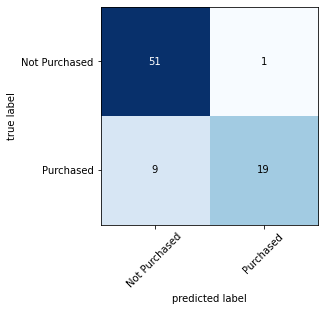

In [55]:
plot_confusion_matrix(cf_test,class_names=["Not Purchased","Purchased"])

In [56]:
cf_train=confusion_matrix(y_train,y_pred_train)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ea059c3f08>)

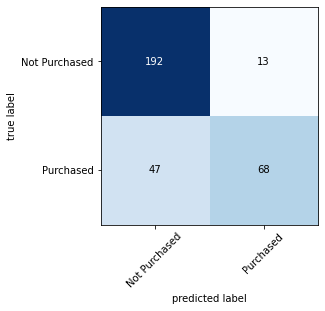

In [57]:
plot_confusion_matrix(cf_train,class_names=["Not Purchased","Purchased"])

### Real time prediction

In [68]:
dataset.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [67]:
age=35
salary=400000
gender="Male"

In [68]:
data=[[age,salary,0,1]]

In [69]:
data

[[35, 400000, 0, 1]]

In [70]:
data=sc.transform(data)

In [71]:
data

array([[0.4047619 , 2.85185185, 0.        , 1.        ]])

In [72]:
lor_model.predict(data)

array([1], dtype=int64)

In [73]:
lor_model.predict_proba(data)

array([[0.0033765, 0.9966235]])

In [74]:
lor_model

LogisticRegression()

In [78]:
lor_model.sc=sc

#### Save the model

In [79]:
import joblib

In [80]:
joblib.dump(lor_model,"purchase_prediction.pkl")

['purchase_prediction.pkl']